
Expectation: A working solution where the learned class label using Logistic Regression is similar (for most possible points) to the training class label.

Optional: Show the decision boundary. Note that it is not trivial to the draw the decision boundary in the examples below.



**Another tasks**

- splitting data to train and test, and evaluating the model on training and testing subsets, and evaluating the model on training and testing subsets using Accuracy, plotting the x with y and pred_y, and loss curve.
- Using the logistic regression of sikit-learn.
- Confusion matrx, classification report.




In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def plotClass(X,y,p):
    for i in range(y.shape[1]):
        if y[0,i]==0:
            plt.plot(X[0,i],X[1,i],'r'+p)
        else:
            plt.plot(X[0,i],X[1,i],'b'+p)



Logistic regression Steps:

- Creat A or Xbig
- initilize w
- iteration until loss is converged:
  - compute z= w* A
  - compute y_pred= sigmoid(z)
  - compute loss between y and y_pred, then append it to loss list
  - compute gradiant
  - update w, w= w- lr*gradiant


## Exercise #1

(200, 2)
(200, 1)


array([[3.61572692, 6.11556458],
       [3.8534498 , 4.19977211],
       [4.02711156, 4.48394453],
       [5.45348017, 5.50342555],
       [3.87261009, 3.43276862],
       [4.14676346, 5.70397446],
       [5.66024474, 4.04846303],
       [4.82673012, 4.7935383 ],
       [4.79423366, 4.57809999],
       [6.32366963, 3.8170133 ]])

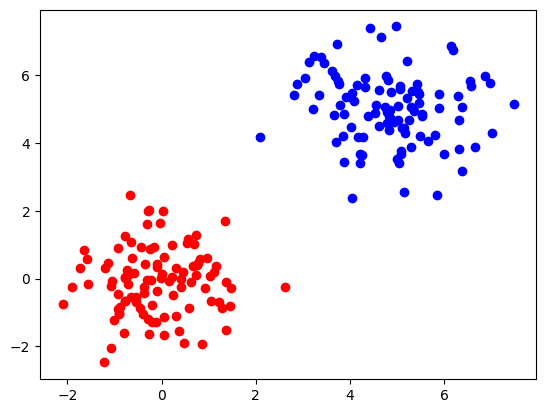

In [19]:
num_data=100 # data points per class

x1=np.random.randn(2,num_data)+5
x0=np.random.randn(2,num_data)

y1=np.ones((1,num_data))
y0=np.zeros((1,num_data))

X=np.concatenate((x1,x0),axis=1)
y=np.concatenate((y1,y0), axis=1)
plotClass(X,y,'o')
X = X.T
y = y.T
print(X.shape)
print(y.shape)

X[:10]

In [18]:
col = np.ones((X.shape[0], 1))
col[:10]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [20]:
A = np.concatenate((col, X), axis =1)
print(A.shape)

(200, 3)


In [21]:
A[:10]

array([[1.        , 3.61572692, 6.11556458],
       [1.        , 3.8534498 , 4.19977211],
       [1.        , 4.02711156, 4.48394453],
       [1.        , 5.45348017, 5.50342555],
       [1.        , 3.87261009, 3.43276862],
       [1.        , 4.14676346, 5.70397446],
       [1.        , 5.66024474, 4.04846303],
       [1.        , 4.82673012, 4.7935383 ],
       [1.        , 4.79423366, 4.57809999],
       [1.        , 6.32366963, 3.8170133 ]])

In [22]:
def sigmoid(z):
  return 1/(1+np.exp(-z))


def loss(yhat, y):
  return np.sum(-y*np.log(yhat) - (1-y)*np.log(1-yhat), axis =0)



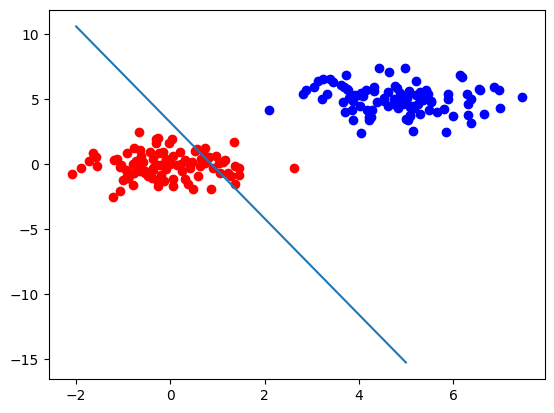

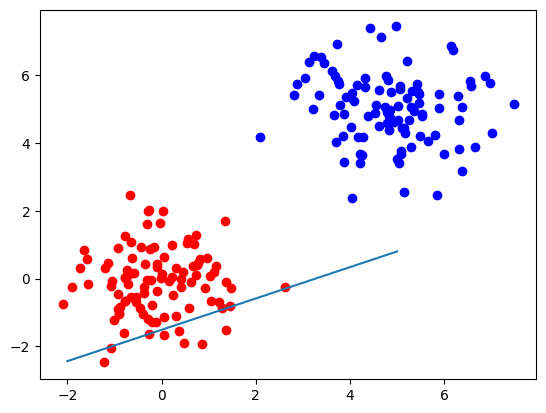

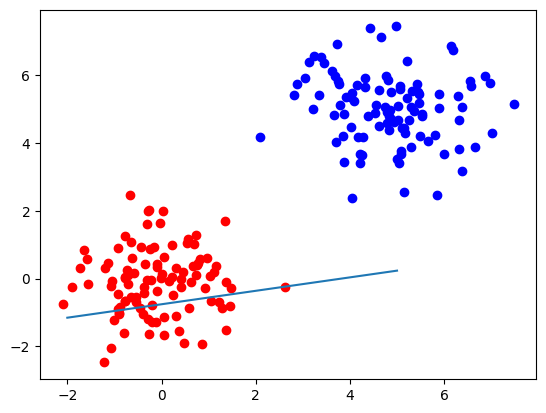

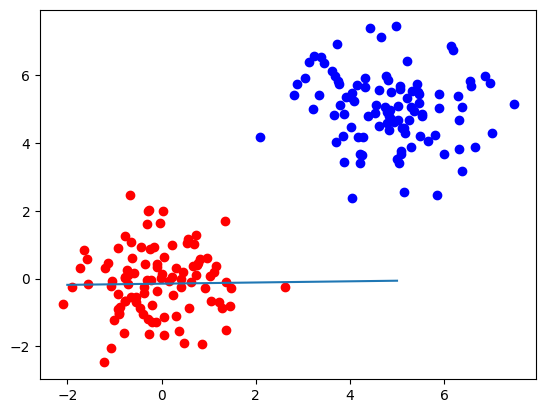

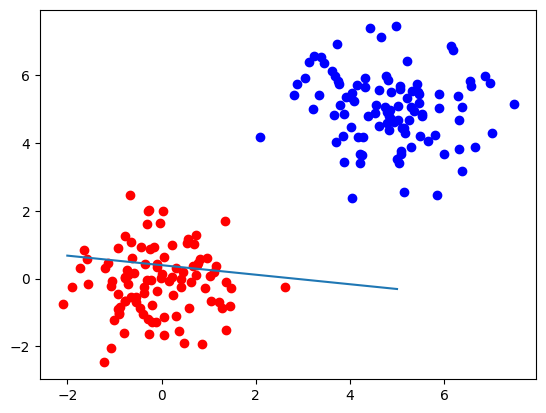

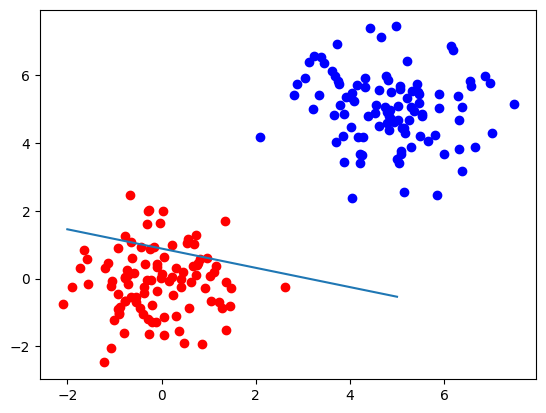

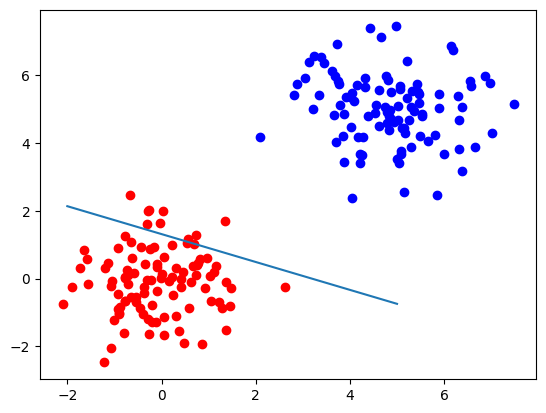

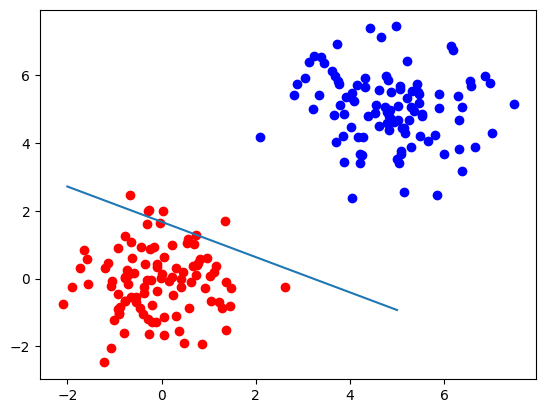

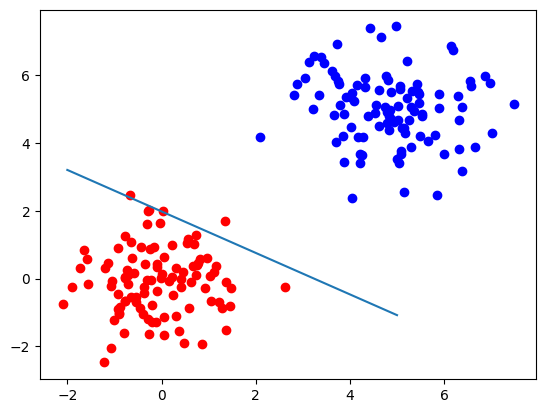

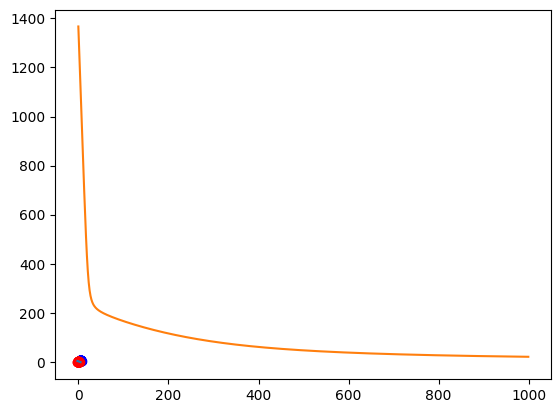

In [23]:
# Z = X@theta

# w is theta
w = np.random.randn(A.shape[1],1)

lr = 0.0001
ls = []

for i in range(1000):
  # X is represented by A
  Z = A@w
  # print(Z.shape) #(200, 1)

  yhat = sigmoid(Z)
  # print(yhat.shape) #(200, 1)

  l = loss(yhat, y)
  ls.append(l)
  #dw represent dL/dw
  # X is represented in the code by A
  dw = A.T @ (yhat - y)
  # plotting decison boundary


  #Plotting the decesion boundary
  if i%100 ==0:
    plt.figure()
    x1 = np.linspace(-2, 5 , 3)
    x2 = (-w[0] - w[1]*x1)/ w[2]
    plotClass(X.T,y.T,'o')
    plt.plot(x1,x2)


  w = w - lr*dw

plt.figure
plt.plot(ls)

In [11]:
# findding the decioshn boundyar

#z = w0 + w1*x1 + w2* x2
#z =0
#0 = w0 + w1*x1 + w2*x2
# x2 = (-w0 - w1*x1)/ w2


In [ ]:
x1

array([-2. ,  1.5,  5. ])

## Exercise #2

(1000,)
(1, 1000)
(2, 1000)
(1, 1000)


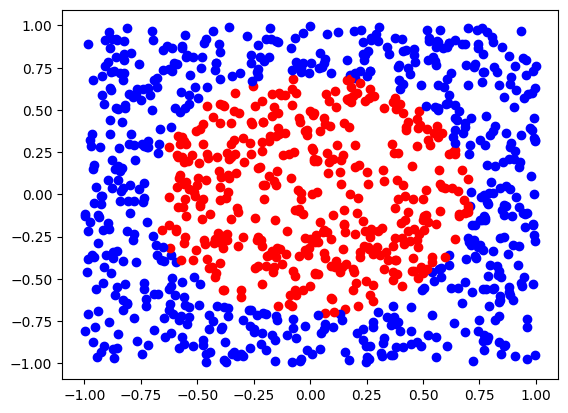

In [24]:

num_data=1000 # data points per class

X=np.random.uniform(-1,1,[2,num_data])
# print(X.shape)


y=X[0,:]**2+X[1,:]**2-0.5>0
# print(y[:10])

y= y.astype(np.int8)
print(y.shape)

y=y[None,:]
print(y.shape)

print(X.shape)
print(y.shape)

plotClass(X,y,'o')


In [25]:
X = X.T
y = y.T

print(X.shape)
print(y.shape)
print(y[0].shape)

(1000, 2)
(1000, 1)
(1,)


In [26]:
def sigmoid(z):
  return 1/(1+np.exp(-z))


def loss(yhat, y):
  eps = 1e-10
  return np.sum(-y*np.log(yhat+eps) - (1-y)*np.log(1-yhat+eps), axis =0)



In [27]:
# create all posible combinations

M = 3
Xbig = []
for i in range(M+1):
  for j in range(M+1):
    Xbig.append(X[:,0]**i * X[:, 1]**j)

Xbig = np.array(Xbig)
print(Xbig.shape) #(16, 2)

Xbig= Xbig.T
print(Xbig.shape) #(2, 16)


# 1, x1, x2, x1^2,....., X1*x2, ....., x1^3*x2^3= 16 features

(16, 1000)
(1000, 16)


In [28]:
Xbig

array([[ 1.00000000e+00, -6.46090476e-01,  4.17432903e-01, ...,
         1.54143593e-01, -9.95907071e-02,  6.43446073e-02],
       [ 1.00000000e+00, -9.64131301e-01,  9.29549166e-01, ...,
        -1.50499945e-02,  1.45101708e-02, -1.39897098e-02],
       [ 1.00000000e+00,  3.19000387e-01,  1.01761247e-01, ...,
        -1.87983093e-03, -5.99666793e-04, -1.91293939e-04],
       ...,
       [ 1.00000000e+00, -2.09730183e-01,  4.39867497e-02, ...,
         5.90262780e-02, -1.23795921e-02,  2.59637411e-03],
       [ 1.00000000e+00,  3.47334396e-01,  1.20641183e-01, ...,
        -1.91832972e-03, -6.66301895e-04, -2.31429567e-04],
       [ 1.00000000e+00,  5.57840840e-01,  3.11186403e-01, ...,
        -2.35853184e-01, -1.31568538e-01, -7.33943039e-02]])

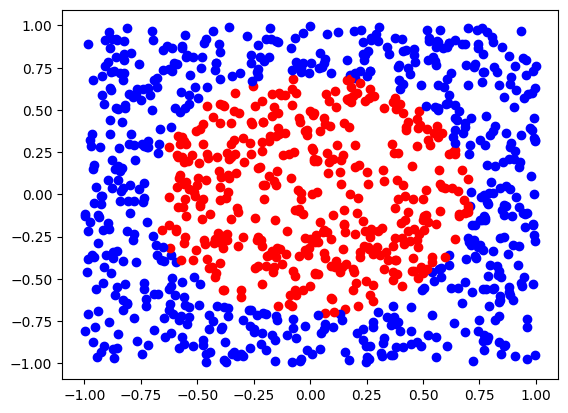

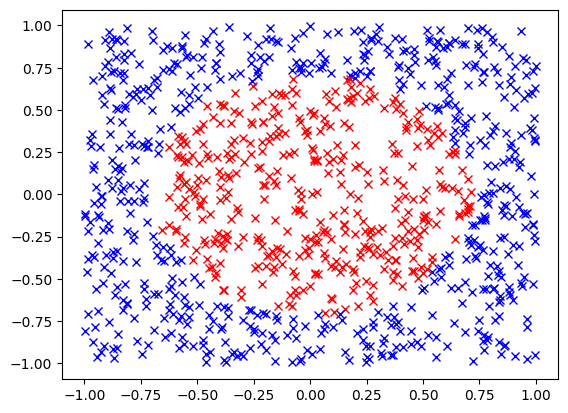

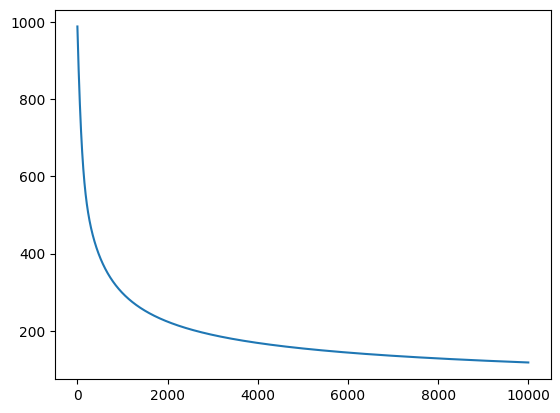

In [29]:
# w is theat
w = np.random.randn(Xbig.shape[1], 1)
#print(w.shape) # (16, 1)

lr = 0.0001

ls = []
for i in range(10000):
  Z = Xbig@w
  # print(Z.shape) #(1000, 1)

  yhat = sigmoid(Z)
  # print(yhat.shape) #(1000, 1)

  l = loss(yhat, y)

  dw = Xbig.T@ (yhat - y)
  w = w-lr*dw
  ls.append(l)


plotClass(X.T, y.T, 'o')
plt.figure()
plotClass(X.T, (yhat.T>0.5), 'x')

plt.figure()
plt.plot(ls)

## Exercise #3

(2, 1000)
(1, 1000)


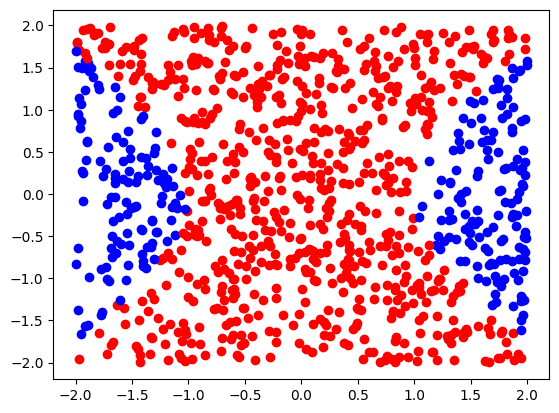

In [ ]:

num_data=1000 # data points per class

X=np.random.uniform(-2,2,[2,num_data])
y=X[0,:]**2-X[1,:]**2-1>0
y=(y[None,:]).astype(np.int8)
plotClass(X,y,'o')
print(X.shape)
print(y.shape)
X = X.T
y = y.T

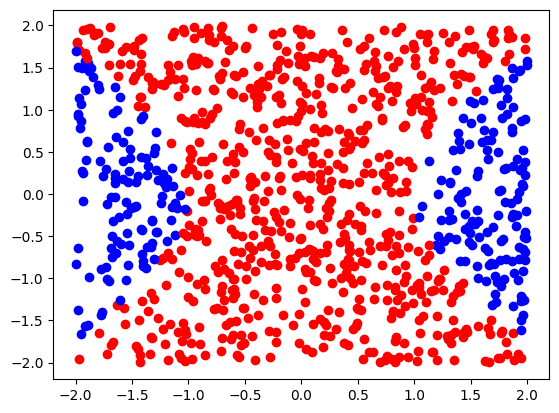

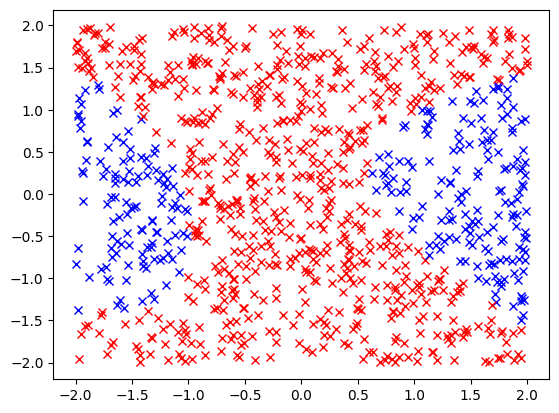

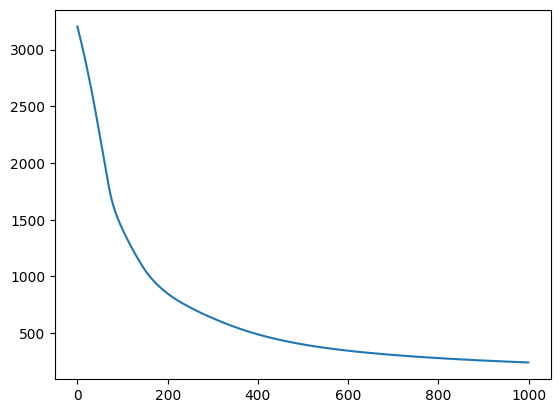

In [ ]:

M = 3

Xbig = []
for i in range(M+1):
  for j in range(M+1):
    Xbig.append(X[:,0]**i * X[:, 1]**j)


Xbig = np.array(Xbig).T

# w is theat
w = np.random.randn(Xbig.shape[1], 1)
lr = 0.00001

ls = []
for i in range(1000):
  Z = Xbig@w
  yhat = sigmoid(Z)
  l = loss(yhat, y)

  dw = Xbig.T@ (yhat - y)
  w = w-lr*dw
  ls.append(l)


plotClass(X.T, y.T, 'o')
plt.figure()
plotClass(X.T, (yhat.T>0.5), 'x')

plt.figure()
plt.plot(ls)